In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Step 1: Load and Explore the Data
# Replace 'your_dataset.csv' with the actual file name
file_path = 'covtype.csv'
data = pd.read_csv(file_path)

In [16]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2               

In [37]:
def reversed_dummies(df: pd.DataFrame, dummy_cols: list, new_header: str, prefix='_') ->'DataFrame':
    serial=df[dummy_cols].idxmax(axis=1).str.split(prefix).str[-1]
    return pd.concat([df.drop(dummy_cols,axis=1),pd.DataFrame(serial,columns=[new_header])],axis=1)
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [39]:
dummy_cols=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']
df=reversed_dummies(data,dummy_cols,'Soil')
dummy_cols=['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
df=reversed_dummies(df,dummy_cols,'Wilderness')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil,Wilderness
0,2596,51,3,258,0,510,221,232,148,6279,5,Type29,Area1
1,2590,56,2,212,-6,390,220,235,151,6225,5,Type29,Area1
2,2804,139,9,268,65,3180,234,238,135,6121,2,Type12,Area1
3,2785,155,18,242,118,3090,238,238,122,6211,2,Type30,Area1
4,2595,45,2,153,-1,391,220,234,150,6172,5,Type29,Area1


In [40]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000


<ipython-input-41-d0283efb02fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="coolwarm");


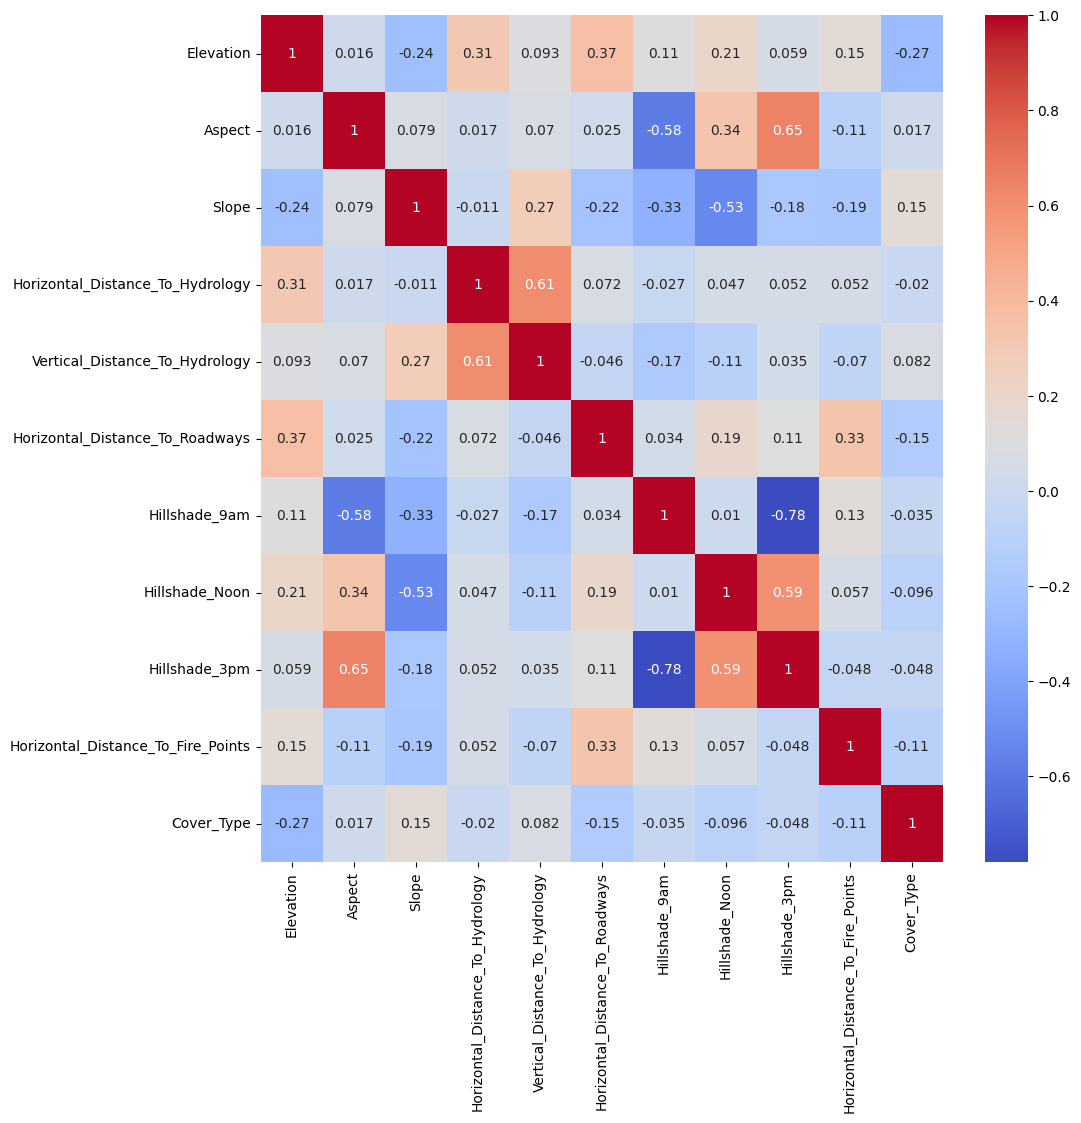

In [41]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

In [17]:
# Step 2: Preprocess the Data
# Assuming no missing values for simplicity
# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
                                     'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                                     'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                                     'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                                     'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                                     'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                                     'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                                     'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                                     'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])


In [18]:
# Display the first few rows of the dataset
# print("\nFirst Few Rows of the Dataset:")
print(data.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [19]:
# Displaying the first few rows of the dataset in a simple table format
print("\nFirst Few Rows of the Dataset:")
print(data.head().to_string(index=False))


First Few Rows of the Dataset:
 Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Cover_Type  Wilderness_Area1_0  Wilderness_Area1_1  Wilderness_Area2_0  Wilderness_Area2_1  Wilderness_Area3_0  Wilderness_Area3_1  Wilderness_Area4_0  Wilderness_Area4_1  Soil_Type1_0  Soil_Type1_1  Soil_Type2_0  Soil_Type2_1  Soil_Type3_0  Soil_Type3_1  Soil_Type4_0  Soil_Type4_1  Soil_Type5_0  Soil_Type5_1  Soil_Type6_0  Soil_Type6_1  Soil_Type7_0  Soil_Type7_1  Soil_Type8_0  Soil_Type8_1  Soil_Type9_0  Soil_Type9_1  Soil_Type10_0  Soil_Type10_1  Soil_Type11_0  Soil_Type11_1  Soil_Type12_0  Soil_Type12_1  Soil_Type13_0  Soil_Type13_1  Soil_Type14_0  Soil_Type14_1  Soil_Type15_0  Soil_Type15_1  Soil_Type16_0  Soil_Type16_1  Soil_Type17_0  Soil_Type17_1  Soil_Type18_0  Soil_Type18_1  Soil_Type19_0  Soil_Type19_1  Soil_Type20_0  Soil_Type20_1  Soil_T

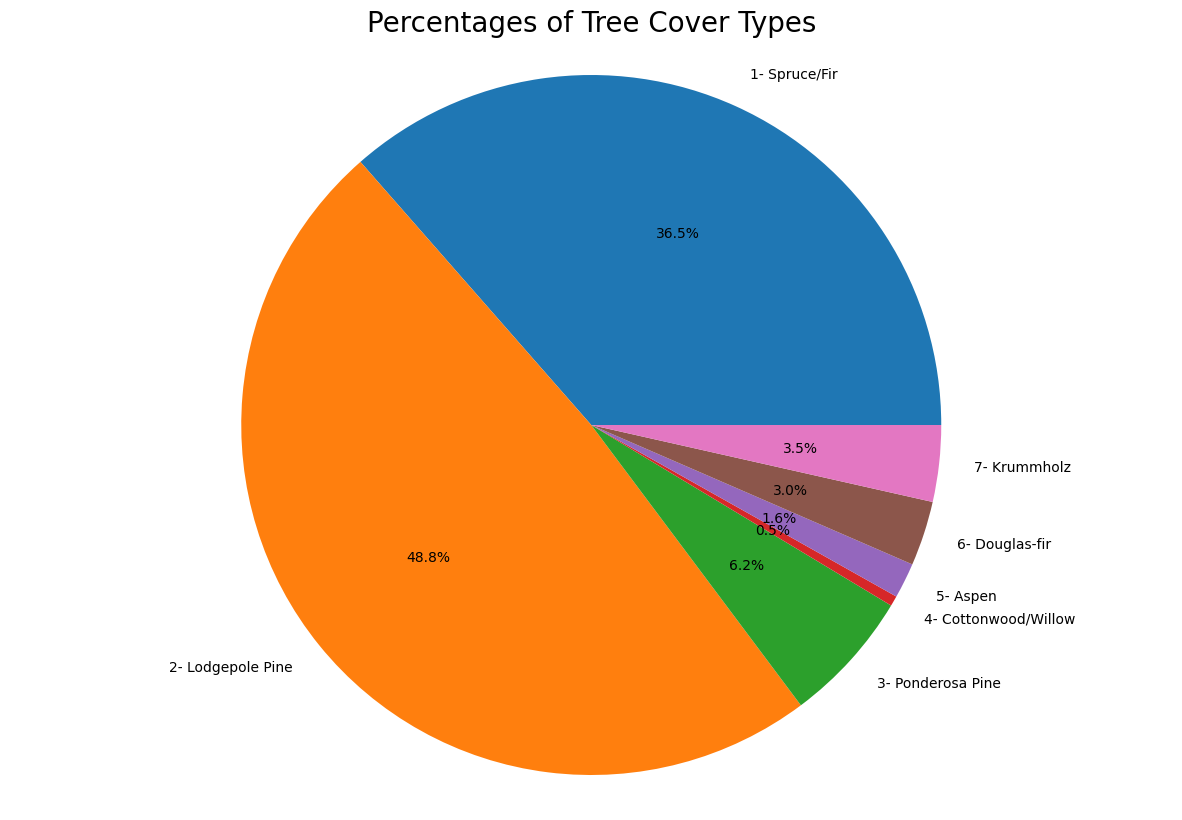

In [31]:
labels= '1- Spruce/Fir', '2- Lodgepole Pine', '3- Ponderosa Pine', '4- Cottonwood/Willow', '5- Aspen', '6- Douglas-fir', '7- Krummholz'

trees_dist = data.groupby('Cover_Type').size()
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15,10)
ax1.pie(trees_dist, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Percentages of Tree Cover Types',fontsize=20)
plt.show()

In [20]:
# Step 3: Split the Data
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
# Step 4: Choose and Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Step 5: Evaluate the Model
predictions = model.predict(X_test)

In [23]:
print("NaN values in y_test:", y_test.isnull().sum())


NaN values in y_test: 0


In [24]:


# Step 5: Evaluate the Model
# Handle NaN values in y_test and X_test
nan_indices = y_test[y_test.isnull()].index
y_test = y_test.dropna()
X_test = X_test.drop(index=nan_indices)
predictions = model.predict(X_test)

# Check for NaN values in y_test
print("NaN values in y_test:", y_test.isnull().sum())

# Ensure y_test and predictions have the same length
print("Length of y_test:", len(y_test))
print("Length of predictions:", len(predictions))

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {accuracy}")




NaN values in y_test: 0
Length of y_test: 116203
Length of predictions: 116203

Accuracy: 0.9500443189934855


In [25]:

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42557
           2       0.94      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.83      0.87       526
           5       0.94      0.75      0.83      1995
           6       0.93      0.88      0.90      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.95    116203
   macro avg       0.94      0.90      0.92    116203
weighted avg       0.95      0.95      0.95    116203



In [26]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[39894  2544     0     0    11     5   103]
 [ 1376 54844   109     0    86    73    12]
 [    2   110  6836    24     5   144     0]
 [    0     0    73   437     0    16     0]
 [   37   431    18     0  1500     9     0]
 [    2   127   253    18     2  3087     0]
 [  189    26     0     0     0     0  3800]]


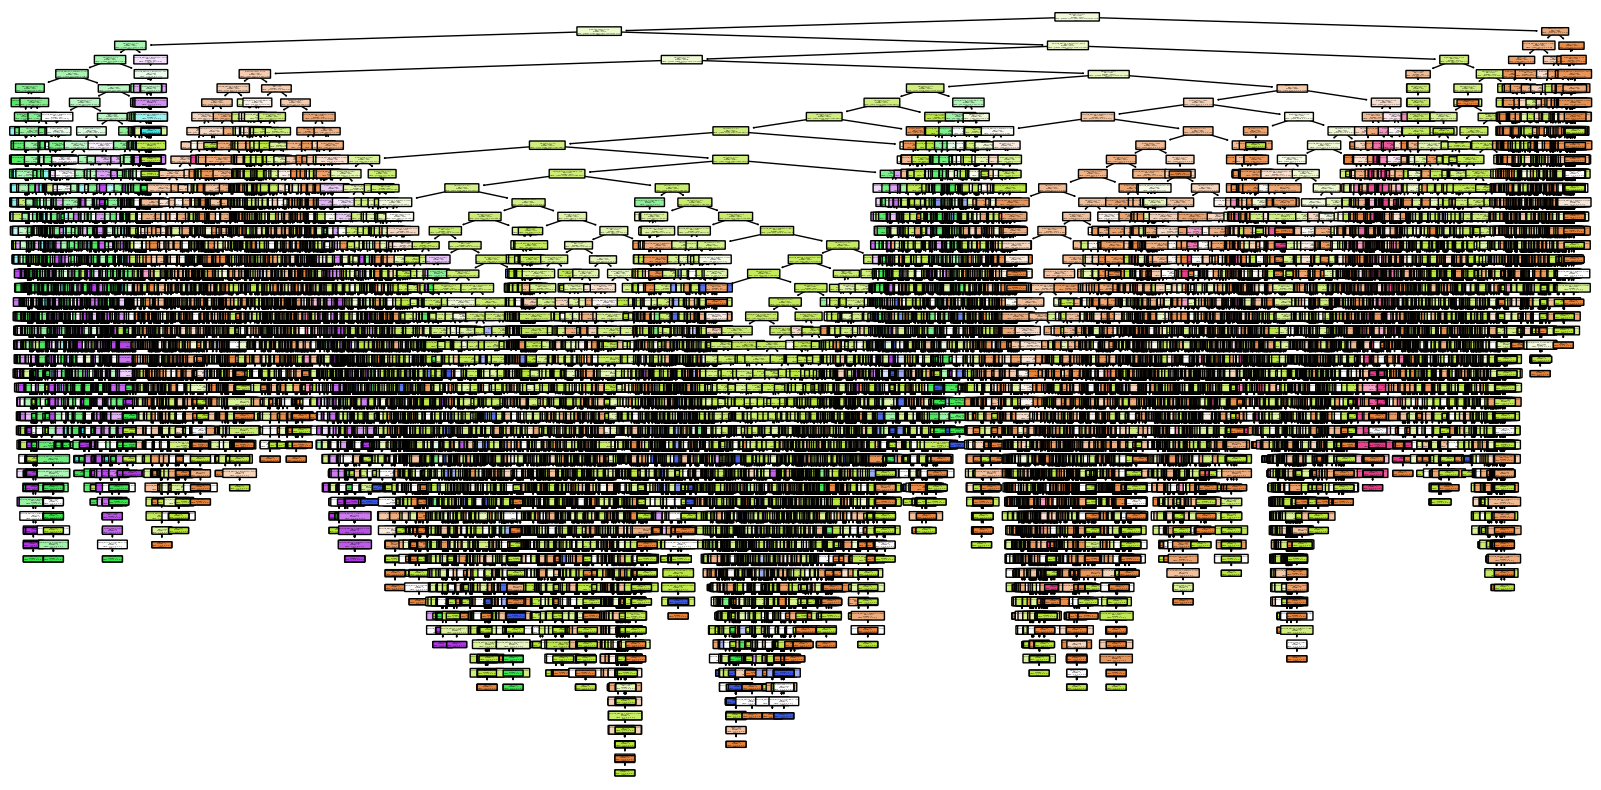

In [ ]:
# Step 6: Visualize a Decision Tree from the Random Forest
# # Assuming you want to visualize the first tree (index 0)
# plt.figure(figsize=(20, 10))
# plot_tree(model.estimators_[0], feature_names=X.columns, class_names=[str(i) for i in range(1, 8)], filled=True, rounded=True)
# plt.show()

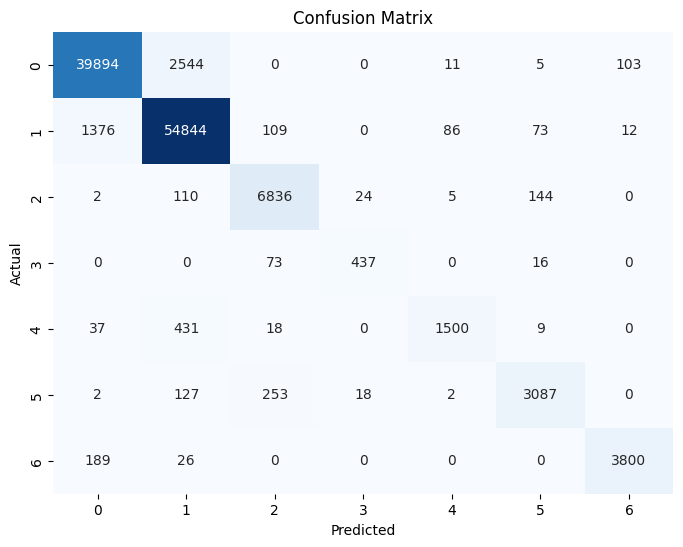

In [28]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Accuracy: 0.8631794871794872

Decision Tree Classification Report:
              precision    recall  f1-score   support

         1.0       0.77      0.77      0.77       745
         2.0       0.90      0.89      0.90      1889
         3.0       0.80      0.77      0.78       445
         4.0       0.95      0.92      0.93       449
         5.0       0.87      0.90      0.89       482
         6.0       0.79      0.82      0.80       440
         7.0       0.92      0.94      0.93       425

    accuracy                           0.86      4875
   macro avg       0.86      0.86      0.86      4875
weighted avg       0.86      0.86      0.86      4875


Decision Tree Confusion Matrix:
[[ 572  133    1    0    8    1   30]
 [ 140 1690    3    0   42   11    3]
 [   0   11  341   12    7   74    0]
 [   0    1   28  411    0    9    0]
 [   7   31    6    0  435    3    0]
 [   0   15   49   10    6  360    0]
 [  22    4    0    0    0    0  399]]


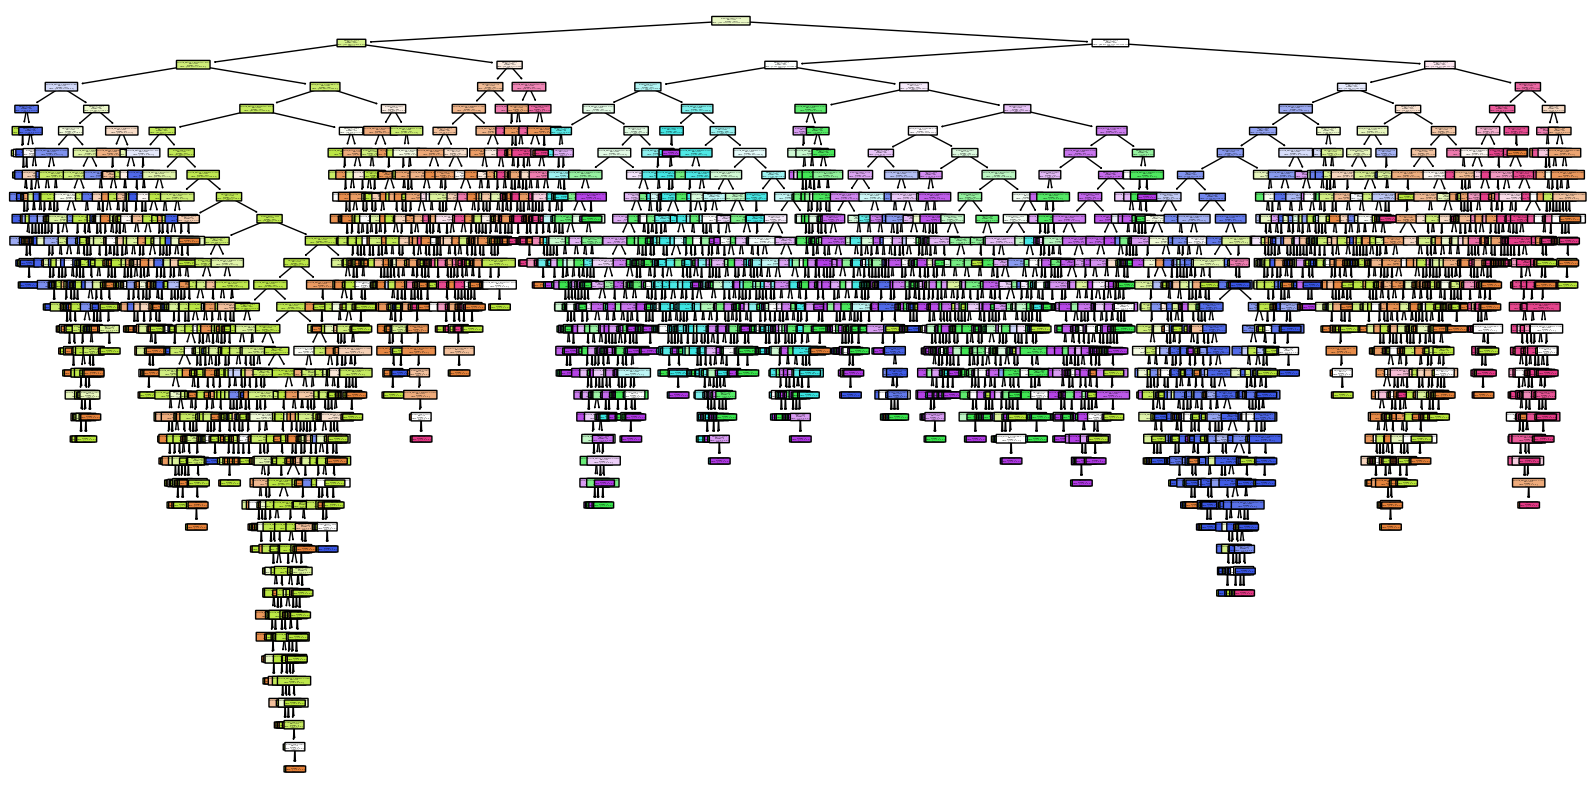

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f"Decision Tree Accuracy: {tree_accuracy}")

# Display the Classification Report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, tree_predictions))

# Display the Confusion Matrix
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, tree_predictions))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=[str(i) for i in range(1, 8)], filled=True, rounded=True)
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes Classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes model
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
nb_predictions = naive_bayes.predict(X_test)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Gaussian Naive Bayes Accuracy: {nb_accuracy}")

# Display the Classification Report
print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

# Display the Confusion Matrix
print("\nGaussian Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))


Gaussian Naive Bayes Accuracy: 0.6377435897435897

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.27      0.34       745
         2.0       0.72      0.86      0.78      1889
         3.0       0.43      0.76      0.55       445
         4.0       0.70      0.86      0.77       449
         5.0       0.53      0.42      0.47       482
         6.0       0.80      0.03      0.05       440
         7.0       0.79      0.82      0.81       425

    accuracy                           0.64      4875
   macro avg       0.63      0.57      0.54      4875
weighted avg       0.65      0.64      0.60      4875


Gaussian Naive Bayes Confusion Matrix:
[[ 203  442    3    0   35    1   61]
 [ 131 1616   24    1   86    1   30]
 [   0    1  339   98    6    1    0]
 [   0    0   61  388    0    0    0]
 [  42  167   69    0  202    0    2]
 [  13    6  294   67   48   12    0]
 [  55   19    0    0    2    0  349]]


In [ ]:
# new code for the decision tree

dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

Confusion Matrix:
[557 142   1   0  14   1  30]
[ 138 1687    3    0   47   11    3]
[  0  13 344  14   7  67   0]
[  0   1  29 409   0  10   0]
[  5  36   4   0 435   2   0]
[  6  10  52  11   8 353   0]
[ 22   3   0   0   0   0 400]
              precision    recall  f1-score   support

         1.0       0.77      0.75      0.76       745
         2.0       0.89      0.89      0.89      1889
         3.0       0.79      0.77      0.78       445
         4.0       0.94      0.91      0.93       449
         5.0       0.85      0.90      0.88       482
         6.0       0.80      0.80      0.80       440
         7.0       0.92      0.94      0.93       425

    accuracy                           0.86      4875
   macro avg       0.85      0.85      0.85      4875
weighted avg       0.86      0.86      0.86      4875

